In [66]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [44]:
dataset=pd.read_csv("IMDb.csv")
dataset.head()
dataset.drop('id', axis=1)

features=['castTotalLikes','directorLikes','actor1likes','movieLikes','fbPosters','year','duration','genre','contentRating','criticReviews','userReviews','userVotes','rating']
dataset=dataset[features]
dataset.head()

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,Action,PG-13,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,Action,PG-13,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,Action,PG-13,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,Action,PG-13,813.0,2701.0,1144337,8.5
4,143,131.0,131.0,0,0.0,NaN,NaN,Documentary,NaN,NaN,NaN,8,7.1


In [45]:
dataset=dataset.dropna()
dataset.describe().round(1)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,criticReviews,userReviews,userVotes,rating
count,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0
mean,10212.4,723.1,6883.4,7991.4,1.4,2002.1,108.8,148.9,291.4,89859.8,6.4
std,17929.4,2883.5,14600.7,19831.7,2.0,12.5,22.2,121.1,386.2,142162.3,1.1
min,0.0,0.0,0.0,0.0,0.0,1916.0,20.0,1.0,1.0,6.0,1.6
25%,1576.0,9.0,656.0,0.0,0.0,1999.0,94.0,61.0,80.0,11798.0,5.8
50%,3317.0,54.0,1000.0,181.0,1.0,2005.0,104.0,120.0,173.0,39956.0,6.5
75%,14638.0,212.0,12000.0,6000.0,2.0,2010.0,118.0,204.0,346.0,104481.0,7.2
max,656730.0,23000.0,640000.0,349000.0,43.0,2016.0,330.0,813.0,5060.0,1689764.0,9.3


In [46]:
#Datasets for Hypothesis Testing with significance threshold of 0.1
#if pvalue>0.1 then there is no statistical difference between the two samples

c1=dataset[dataset.year <= 1990]
c2=dataset[dataset.year > 1990]
from scipy import stats
stats.ttest_ind(c1['rating'],c2['rating'])
#

Ttest_indResult(statistic=12.486499362595312, pvalue=3.2389794818634726e-35)

In [47]:
# dataset.to_csv("imbd.csv", sep=',', encoding='utf-8')


dataset=pd.read_csv("IMDb2.csv")
dataset=dataset.drop('id', axis=1)
dataset.shape

(4641, 13)

In [48]:
#Prior to modelling it important check if two variables are highly correlated
#DataFrame.corr(method='pearson', min_periods=1)
#Compute pairwise correlation of columns, excluding NA/null values
dataset.corr().round(3)
# dataset['actor1likes'].corr(dataset['movieLikes'])


,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
castTotalLikes,1.000,0.122,0.947,0.216,0.086,0.127,0.130,-0.079,-0.115,0.265,0.205,0.269,0.100
directorLikes,0.122,1.000,0.095,0.161,-0.043,-0.060,0.177,0.007,-0.018,0.177,0.219,0.295,0.180
actor1likes,0.947,0.095,1.000,0.141,0.064,0.100,0.093,-0.059,-0.088,0.194,0.146,0.198,0.089
movieLikes,0.216,0.161,0.141,1.000,0.011,0.238,0.214,-0.082,-0.095,0.690,0.391,0.530,0.261
fbPosters,0.086,-0.043,0.064,0.011,1.000,0.062,0.022,-0.035,-0.046,-0.033,-0.072,-0.027,-0.072
year,0.127,-0.060,0.100,0.238,0.062,1.000,-0.127,-0.037,-0.338,0.319,0.017,0.027,-0.214
duration,0.130,0.177,0.093,0.214,0.022,-0.127,1.000,-0.100,-0.035,0.245,0.353,0.341,0.363
genre,-0.079,0.007,-0.059,-0.082,-0.035,-0.037,-0.100,1.000,0.183,-0.081,-0.104,-0.123,-0.009
contentRating,-0.115,-0.018,-0.088,-0.095,-0.046,-0.338,-0.035,0.183,1.000,-0.124,-0.101,-0.098,0.142
criticReviews,0.265,0.177,0.194,0.690,-0.033,0.319,0.245,-0.081,-0.124,1.000,0.594,0.614,0.342


In [49]:
#dropping highly correlated variables
#def correlation(dataset, threshold):
    #col_corr = set() # Set of all the names of deleted columns
    #corr_matrix = dataset.corr()
    #for i in range(len(corr_matrix.columns)):
        #for j in range(i):
            #if corr_matrix.iloc[i, j] >= threshold:
                #colname = corr_matrix.columns[i] # getting the name of column
                #col_corr.add(colname)
                #if colname in dataset.columns:
                    #del dataset[colname] # deleting the column from the dataset

    #print(dataset)

#drop variable 'actor1likes' since 'actor1likes-movieLikes' are highly correlated
dataset=dataset.drop('actor1likes', axis=1)
dataset.head()

,castTotalLikes,directorLikes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0,33000,0,2009,178,0,0,723,3054,886204,7.9
1,48350,563,0,0,2007,169,0,0,302,1238,471220,7.1
2,11700,0,85000,1,2015,148,0,0,602,994,275868,6.8
3,106759,22000,164000,0,2012,164,0,0,813,2701,1144337,8.5
4,1873,475,24000,1,2012,132,0,0,462,738,212204,6.6


In [50]:
dataset.head()

,castTotalLikes,directorLikes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0,33000,0,2009,178,0,0,723,3054,886204,7.9
1,48350,563,0,0,2007,169,0,0,302,1238,471220,7.1
2,11700,0,85000,1,2015,148,0,0,602,994,275868,6.8
3,106759,22000,164000,0,2012,164,0,0,813,2701,1144337,8.5
4,1873,475,24000,1,2012,132,0,0,462,738,212204,6.6


In [51]:
#Multiple Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1]
y = dataset['rating']
#X.head()
#y.head()

# X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.40)
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)
# X.shape[0]

#The dependent variable is rating. All other variables are independent.
#Linear model was cross validated for different combination of variables and the least significant variables were dropped
#Model with the least AIC and highest R-squared is selected

# x=data.drop(['rating','movieLikes','directorLikes','genre','castTotalLikes'], axis=1)
# y=data.rating

In [102]:
# #Building Optimal Model
# import statsmodels.formula.api as sm

# X = X.astype(np.float)
# X = np.append(arr = np.ones((4641,1)).astype(int), values = X, axis = 1)
# X
# X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10]]
# regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
# regressor_OLS.summary()
# #remove x1
# X_opt = X[:,[0,2,3,4,5,6,8,9]]
# regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
# regressor_OLS.summary()
# #remove x6
# X_opt = X[:,[0,2,3,4,5,8,9]]
# regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
# regressor_OLS.summary()
# #remove x2
# X_opt = X[:,[0,3,4,5,8,9]]
# regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
# regressor_OLS.summary()
# # x=data.drop(['rating','movieLikes','directorLikes','genre','castTotalLikes'], axis=1)



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     249.8
Date:                Wed, 16 Jan 2019   Prob (F-statistic):          1.37e-194
Time:                        16:34:55   Log-Likelihood:                -6588.6
No. Observations:                4641   AIC:                         1.319e+04
Df Residuals:                    4636   BIC:                         1.322e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9537      1.206     14.881      0.000      15.588      20.319
x1            17.9537      1.206     14.881      0.000      15.588      20.319
x2          4.242e-06   8.41e-07      5.046      0.000    2.59e-06    5.89e-06
x3          4.043e-05   5.21e-06      7.753      0.000    3.02e-05    5.07e-05
x4            -0.0156      0.001    -13.002      0.000      -0.018      -0.013
x5             0.0155      0.001     22.755      0.000       0.014       0.017
==============================================================================
Omnibus:                      496.145   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.135
Skew:                          -0.773   Prob(JB):                    1.45e-170
Kurtosis:                       4.286   Cond. No.                     2.22e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.01e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
#Linear model was cross validated for different combination of variables and the least significant variables were dropped
#Model with the least AIC and highest R-squared is selected

X=dataset.drop(['rating','movieLikes','directorLikes','genre','castTotalLikes'], axis=1)
y=dataset['rating']

In [53]:
#Splitting the data into Training and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.40)
print (X_train.shape) 
print (y_train.shape) 
print (X_test.shape) 
print (y_test.shape)

(2784, 7)
(2784,)
(1857, 7)
(1857,)


In [54]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.876e+04
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:59:54   Log-Likelihood:                -3768.6
No. Observations:                2784   AIC:                             7551.
Df Residuals:                    2777   BIC:                             7593.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
fbPosters        -0.0420      0.009     -4.642      0.000      -0.060      -0.024
year              0.0022   4.82e-05     45.985      0.000       0.002       0.002
duration          0.0135      0.001     15.562      0.000       0.012       0.015
contentRating     0.1200      0.010     12.122      0.000       0.101       0.139
criticReviews     0.0013      0.000      6.710      0.000       0.001       0.002
userReviews      -0.0005   7.65e-05     -6.727      0.000      -0.001      -0.000
userVotes      3.248e-06   2.17e-07     14.940      0.000    2.82e-06    3.67e-06
==============================================================================
Omnibus:                      350.876   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.304
Skew:                          -0.822   Prob(JB):                    4.98e-138
Kurtosis:                       4.658   Cond. No.                     9.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:

# #Accuracy of model
# y_predicted = result.predict(X_test)
# a = pd.DataFrame(y_predicted)
# a = a.round(1)
# b = pd.DataFrame(y_test)
# #drop : bool, default False
# #Just reset the index, without inserting it as a column in the new DataFrame.
# b = b.reset_index(drop=True)
# a['rating'] = b
# a.columns =['predicted', 'actual']
# a['diff'] = round(abs(a['predicted']-a['actual']),2)
# a[:1]

#Calculating difference between Predicted and Actual Ratings

pred=results.predict(X_test)

a=pd.DataFrame(pred)
a
a=a.round(1)
a
b=pd.DataFrame(y_test)
b=b.reset_index(drop=True)
a =a.reset_index(drop=True)
a.columns=['predicted']
b.columns =['actual']
b
difference = round(abs(a['predicted']-b['actual']),2)
difference[:1]
#Optimizing Model achieve a mean score of difference variable close to 0.5 -threshold
round(difference.mean(),4)


0.69820000000000004

<IPython.core.display.Javascript object>


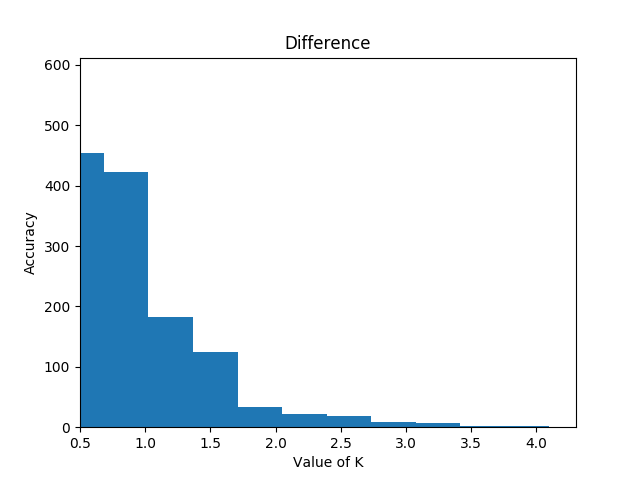

In [56]:
#Visualizing Results
plt.hist(difference,bins=12)
plt.xlim(0.5,)
plt.title("Difference")

In [57]:
print("Predictions within +/-1.0 star: %f"%((difference<1.1).sum()))
print('Total Predictions: %f'%(difference).count())
print ('Accuracy for the Linear Regression Model: %f'%(((difference<1.1).sum())/(difference.count())))

Predictions within +/-1.0 star: 1459.000000
Total Predictions: 1857.000000
Accuracy for the Linear Regression Model: 0.785676


In [58]:
#KNN Model
#Binning dependent variable into groups
#Dependent variable - 'ratings'
#pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')[source]
#Bin values into discrete intervals.
a=data
bins = [0.0,3.0,5.0,7.5,10.0]
groups=['D','C','B','A']
a['categories']=pd.cut(a['rating'],bins,labels=groups)
X = a.drop(['rating', 'categories'], axis=1)
y = a['categories']


In [59]:
#Splitting data into Train and Test set
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.4)

X_train.shape
y_train.shape

(2784,)

<IPython.core.display.Javascript object>


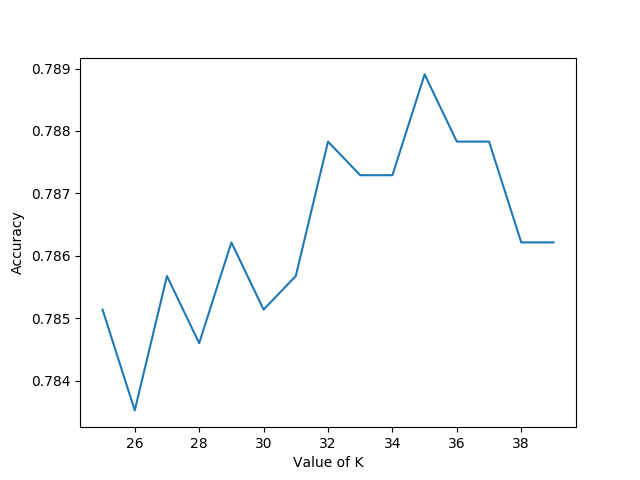

In [67]:
k_range=range(25,40)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    z=metrics.accuracy_score(y_test,pred)
    k_scores.append(z)

plt.plot(k_range,k_scores);
plt.xlabel('Value of K')
plt.ylabel('Accuracy')



In [69]:
k_scores=pd.DataFrame(k_scores)
print('Max Accuracy for KNN Model is: %f'%k_scores.max())

Max Accuracy for KNN Model is: 0.788907
